# 10. 계층적 시계열 또는 그룹화된 시계열 예측

시계열은 종종 관심 있는 다양한 속성(attribute)으로 자연스럽게 나눌 수 있습니다. 예를 들어, 자전거 제조사가 판매한 전체 자전거 수를 로드 바이크, 산악 자전거, 어린이용 자전거, 하이브리드 등과 같이 범주(category) 별로 나눌 수 있습니다. 각각을 더 자세한 범주로 나눌 수 있습니다. 예를 들어, 하이브리드 자전거는 도시용, 통학/통근용, 편안한 자전거, 트레킹 자전거 등으로 나눌 수 있습니다. 이러한 범주는 더 넓은 그룹 범주 안에 속합니다. 그래서 시계열 모음(collection)은 계층적인 합산 구조(hierarchical aggregation structure)를 따릅니다. 따라서 이것을 계층적 시계열(hierarchical time series)이라고 부릅니다. 이는 10.1 절의 주제입니다.

계층적 시계열(hierarchical time series)은 흔히 지리적인 구분 때문에 나타납니다. 예를 들면, 전체 판매량을 국가별로 나눌 수 있습니다. 그리고 각 국가 안의 주(state)별로, 각 주 안에 지역별로, 더 나아가 매장 수준까지 내려갈 수 있습니다.

자전거 제조사는 판매량을 제품 종류와 지리적인 위치를 동시에 고려하여 분배(disaggregate)할 수도 있습니다. 이 경우에는 제품 계층 구조와 지리적 계층 구조를 둘 다 사용할 수 있어서 좀 더 복잡한 합산 구조를 얻게 됩니다. 흔히 이것을 가리켜 “그룹화된 시계열(grouped time series)”이라고 부릅니다. 이는 10.2 절에서 다룹니다.

분배된(disaggregated) 시계열에 기반하여 분배된 예측값을 내는 것은 흔한 일입니다. 그리고 보통은 데이터와 같은 방식으로 예측값을 더해나가는 것이 필요합니다. 예를 들면, 주(state)별 판매량 예측값을 내기 위해서는 지역별 판매량 예측값을 더해야 합니다. 그리고 국가 수준 예측값을 얻기 위해서는 이것을 다시 더해야 합니다.

이 장에서는 어떤 방법으로 더해야 할 커다란 시계열 모임(collection)을 예측하는 작업을 다루겠습니다. 합산 구조에 걸쳐 일관적(coherent)인 예측값이 필요하다는 것이 도전 과제입니다. 즉, 시계열 모임의 합산 구조와 일관적인 방식으로 예측값을 더해나가는 것이 필요합니다. 10.3절부터 10.7절에서는 계층적 시계열과 그룹화된 시계열에서 일관된 예측값을 내는 몇 가지 방법을 다룹니다.

<br>

## 10.01. 계층적 시계열

그림은 $K
=
2
 -$수준 계층 구조를 나타냅니다. 수준 0이라고 부르는 계층 구조의 꼭대기는 “전체(Total)”이고, 데이터를 모두 포함하는 수준입니다.  $
t
=
1
,
…
,
T$
 에 대한 전체(Total) 시계열의  $
t$
 번째 관측값을  $
y_
t$
 라고 씁니다. “전체(Total)”는 수준 1에서 2개의 시계열로 나뉘고, 이것은 다시 계층의 밑바닥 수준에서 각각 3개와 2개로 나뉩니다. 가장 꼭대기의 수준 아래, 마디(node) $ 
j$
 에 해당하는 시계열의  $
t$
 번째 관측값을  $
y_{
j
,
t}$
 로 씁니다. 예를 들어, 수준 1의 마디 A에 대응되는 시계열의  $
t$
 번째 관측값을  $
y_{
A
,
t}$
 로 쓰고, 수준 2의 마디 AB에 대응되는 시계열의 $ 
t$
 번째 관측값을  $
y_{
A
B
,
t}$
 으로 쓰고, 다른 수준에 대한 값도 마찬가지 방식으로 씁니다.
 
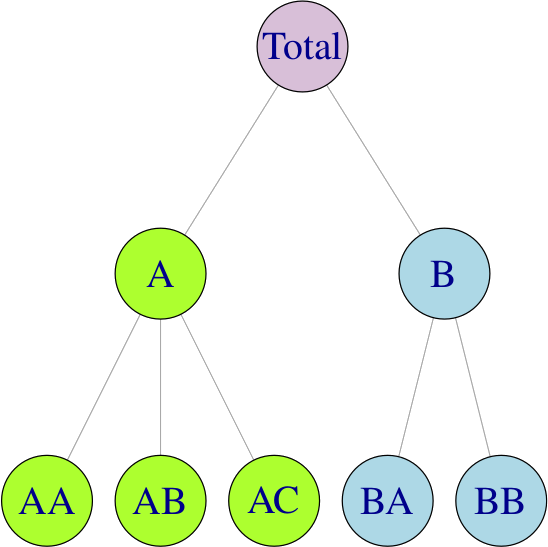

이 간단한 예제에서, 계층 구조에서 시계열의 전체 수는  $
n
=
1
+
2
+
5
=
8$
  이고, 가장 밑바닥 수준의 시계열 개수  $
m
=
5$
 입니다. 모든 계층에서 $ 
n
>
m$
 이라는 것에 주목합시다.

어떤 시간  $
t$
 에 대해, 계층 구조의 가장 밑바닥 수준의 관측값은 위의 시계열의 관측값에 더해질 것입니다.
 

$$\begin{equation}
  y_{t}=y_{AA,t}+y_{AB,t}+y_{AC,t}+y_{BA,t}+y_{BB,t}
  \
\end{equation}$$

그리고

$$\begin{equation}
  y_{A,t}=y_{AA,t}+y_{AB,t}+y_{AC,t}\quad \text{and} \quad  y_{B,t}=y{BA,t}+y_{BB,t}.
  \
\end{equation}$$

$$y_{t}=y_{A,t}+y_{B,t}$$

이것을 합산 제한 조건이나 합산 등식으로 생각할 수 있고 행렬 표기법을 가지고 효과적으로 나타낼 수 있습니다.  $
n
×
n_
K$
  행렬  $
S$
 을 구성합니다.  $
S$
 는 “합산 행렬(summing matrix)”이라고 부릅니다.  $
S$
 는 밑바닥 수준의 시계열을 어떻게 모았는지 나타냅니다.

그림의 계층 구조에 대해 다음과 같이 쓸 수 있습니다.

$$\begin{bmatrix}
    y_{t} \\
    y_{A,t} \\
    y_{B,t} \\
    y_{AA,t} \\
    y_{AB,t} \\
    y_{AC,t} \\
    y_{BA,t} \\
    y_{BB,t}
  \end{bmatrix}
  =
  \begin{bmatrix}
    1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 & 1 \\
    1  & 0  & 0  & 0  & 0  \\
    0  & 1  & 0  & 0  & 0  \\
    0  & 0  & 1  & 0  & 0  \\
    0  & 0  & 0  & 1  & 0  \\
    0  & 0  & 0  & 0  & 1
  \end{bmatrix}
  \begin{bmatrix}
    y_{AA,t} \\
    y_{AB,t} \\
    y_{AC,t} \\
    y_{BA,t} \\
    y_{BB,t}
  \end{bmatrix}$$
  
또는 더 간결한 기호로 적을 수 있습니다.

$$\begin{equation}
  {y}_t={S}{b}_{t},
  \
\end{equation}$$

여기에서  $
y_
t$
 는 시간  $
t$
 에서 계층 구조의 모든 관측값의  $
n$
 -차원 벡터이고,  $
S$
 는 합산 행렬(summing matrix)이고,  $
b_
t$
 는 시간  $
t$
 에서의 계층 구조의 밑바닥 수준의 모든 관측값의  $
m$
 -차원 벡터입니다. 
 
합산 행렬 $
S$
 의 첫 번째 행, 두 번째와 세 번째 행은 위의 식을 나타냅니다. 아래의 단위 행렬에 대한 이러한 행은  $
m$
 -차원 단위 행렬  $
I_
m$
 로 이뤄져 있어, 식의 우변에 있는 가장 아래에 있는 수준의 관측값이 좌변에 있는 것과 같도록 합니다.

<br>

### 예제: 호주 여행객 계층구조

호주는 8개의 지역으로 구분합니다(어떤 것은 주(state)로 어떤 것은 영역(territory)이라고 부릅니다). 각각은 정부와 몇몇 경제적 행정적 자치권을 가지고 있습니다. 각각을 지역(zone)이라고 부르는 영역으로 더 자세히 나눌 수 있습니다. 사업 계획하는 사람이나 관광청은 호주 전체, 주별, 영역별, 그리고 지역 구분에 대한 예측값에 관심이 있습니다. 이 예제에서는 호주 사람이 집을 떠나 묵는 숙박일수로 분기별 국내선 여행객 수요에 집중하겠습니다. 분석을 단순화하기 위해, 2개의 영역과 태즈매니아를 “기타(Other)” 주로 묶겠습니다. 그래서 다음과 같이 6개 주를 가지고 분석을 진행합니다: 뉴 사우스 웨일즈(NSW), 퀸즐랜드(QLD), 남 호주(SAU), 빅토리아(VIC), 서 호주(WAU), 기타(OTH). 각각의 주에서 다음과 같은 지역의 숙박일 수를 다루겠습니다.

<table>
<thead>
<tr>
<th style="text-align:left;">
State
</th>
<th style="text-align:left;">
Zones
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;">
NSW
</td>
<td style="text-align:left;">
대도시 (NSWMetro), 북부 해안 (NSWNthCo), 남부 해안 (NSWSthCo), 남부 내륙 (NSWSthIn), 북부 내륙 (NSWNthIn)
</td>
</tr>
<tr>
<td style="text-align:left;">
QLD
</td>
<td style="text-align:left;">
대도시 (QLDMetro), 중앙 (QLDCntrl), 북부 해안 (QLDNthCo)
</td>
</tr>
<tr>
<td style="text-align:left;">
SAU
</td>
<td style="text-align:left;">
대도시 (SAUMetro), 해안가 (SAUCoast), 내륙 (SAUInner)
</td>
</tr>
<tr>
<td style="text-align:left;">
VIC
</td>
<td style="text-align:left;">
대도시 (VICMetro), 서부 해안 (VICWstCo), 동부 해안 (VICEstCo), 내륙 (VICInner)
</td>
</tr>
<tr>
<td style="text-align:left;">
WAU
</td>
<td style="text-align:left;">
대도시 (WAUMetro), 해안가 (WAUCoast), 내륙 (WAUInner)
</td>
</tr>
<tr>
<td style="text-align:left;">
OTH
</td>
<td style="text-align:left;">
대도시 (OTHMetro), 비-도심 (OTHNoMet)
</td>
</tr>
</tbody>
</table>

NSW에서 5개의 지역, VIC에서 4개의 지역, QLD, SAU, WAU에서 3개의 지역을 다룹니다. 대도시 지역은 주도(capital city)와 대도시권이라고 부르는 주변 지역을 포함합니다. OTH에서는 대도시권(OTHMetro)과 그렇지 않은 곳(OTHNoMet)을 다룹니다. 지리적인 지역에 대한 자세한 내용은 Wickramasuriya, Athanasopoulos, & Hyndman (2019) 의 Appendix C를 참조하시길 바랍니다.

**계층적 시계열을 만들기 위해서 아래의 코드와 같이 `hts()` 함수를 사용하겠습니다. 함수에는 2개의 입력값이 필요합니다: 계층적 구조에 관한 밑바닥 수준 시계열과 정보.**

- `visnights`는 밑바닥 수준 시계열을 포함하는 시계열 행렬입니다. 
- 다른 방식으로도 계층 구조를 함수로 넘길 수 있습니다. 이 경우에는 `characters` 입력을 사용하겠습니다. **`visnights`의 각 행의 이름 첫 3글자는 계층 구조에서 첫 번째 수준(주-state-단위)를 나타내고, 첫 5글자는 밑바닥 수준(지역-zone-단위)을 나타냅니다.**

In [20]:
#install.packages("hts_6.0.2.tar.gz",repos=NULL,type="source")

In [5]:
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)
library(hts)

In [18]:
as.data.frame(visnights) %>% colnames
visnights %>% dim
visnights %>% head

[1] "NSWMetro" "NSWNthCo" "NSWSthCo" "NSWSthIn" "NSWNthIn" "QLDMetro"
 [7] "QLDCntrl" "QLDNthCo" "SAUMetro" "SAUCoast" "SAUInner" "VICMetro"
[13] "VICWstCo" "VICEstCo" "VICInner" "WAUMetro" "WAUCoast" "WAUInner"
[19] "OTHMetro" "OTHNoMet"

[1] 76 20

,NSWMetro,NSWNthCo,NSWSthCo,NSWSthIn,NSWNthIn,QLDMetro,QLDCntrl,QLDNthCo,SAUMetro,SAUCoast,SAUInner,VICMetro,VICWstCo,VICEstCo,VICInner,WAUMetro,WAUCoast,WAUInner,OTHMetro,OTHNoMet
1998 Q1,9.047095,8.565678,5.818029,2.679538,2.977507,12.106052,2.748374,2.137234,2.881372,2.591997,0.8948773,7.490382,2.4420048,3.381972,5.326655,3.075779,3.066555,0.6949954,3.437924,2.073469
1998 Q2,6.962126,7.124468,2.466437,3.010732,3.477703,7.786687,4.040915,2.269596,2.124736,1.375780,0.9792509,5.198178,0.9605047,1.827940,4.441119,2.154929,3.334405,0.5576796,2.677081,1.787939
1998 Q3,6.871963,4.716893,1.928053,3.328869,3.014770,11.380024,5.343964,4.890227,2.284870,1.079542,0.9803289,5.244217,0.7559744,1.351952,3.815645,2.787286,4.365844,1.0061844,3.793743,2.345021
1998 Q4,7.147293,6.269299,2.797556,2.417772,3.757972,9.311460,4.260419,2.621548,1.785889,1.497664,1.5094343,6.274246,1.2716040,1.493415,3.859567,2.752910,4.521996,1.1725514,3.304231,1.943689
1999 Q1,7.956923,9.493901,4.853681,3.224285,3.790760,12.671942,4.186113,2.483203,2.293873,2.247684,0.9635227,9.187422,2.3850583,2.896929,4.588755,3.519564,3.579347,0.3981829,3.510819,2.165838
1999 Q2,6.542243,5.401201,2.759843,2.428489,3.395284,9.582965,4.237806,3.377830,2.197418,1.672802,0.9968803,4.992303,1.3288638,1.547901,4.070401,3.160430,3.408533,0.5960182,2.871867,1.803940


In [19]:
tourism.hts <- hts(visnights, characters = c(3, 5))
tourism.hts

Hierarchical Time Series 
3 Levels 
Number of nodes at each level: 1 6 20 
Total number of series: 27 
Number of observations per series: 76 
Top level series: 
         Qtr1     Qtr2     Qtr3     Qtr4
1998 83.43749 64.55820 71.28537 69.97051
1999 86.39780 66.37302 71.43395 67.41513
2000 84.57620 64.02225 69.43967 71.82642
2001 79.54683 67.14835 68.91585 69.71041
2002 83.27191 62.94816 74.09273 73.98632
2003 83.02724 66.37728 70.69928 70.81113
2004 85.46050 66.63080 73.33738 69.42911
2005 85.35244 59.04067 66.28496 62.61729
2006 82.50608 67.40069 65.92860 69.48278
2007 86.20791 67.23007 68.92216 68.89184
2008 86.83504 59.49575 66.04342 64.22983
2009 74.24875 57.76639 65.15809 64.28372
2010 74.54993 59.58409 67.45860 63.37753
2011 72.06455 62.78902 70.32785 64.76191
2012 80.34629 61.84050 67.39664 70.70337
2013 82.60646 63.91926 64.84309 69.77365
2014 86.89614 71.69453 72.37985 76.31719
2015 89.34610 73.44569 76.84838 79.70481
2016 94.61425 74.58786 78.58591 84.18614

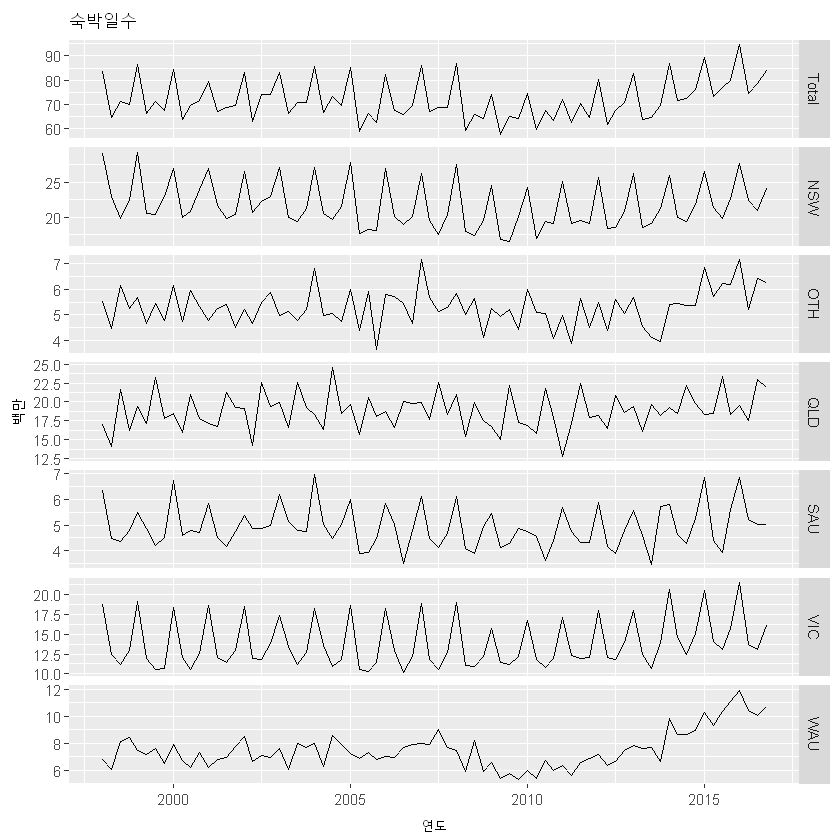

In [6]:
tourism.hts %>% aggts(levels=0:1) %>%
  autoplot(facet=TRUE) +
  xlab("연도") + ylab("백만") + ggtitle("숙박일수")

그림의 위쪽 그래프는 방문객의 전체 숙박일 수를 나타내고, 아래쪽 그래프는 데이터를 주(state)별로 분배한 것을 나타냅니다. 이 결과는 국가 전체로 합산한 수준에서와 주별로 쪼갠 수준에서의 패턴을 나타냅니다. `aggts()` 함수는 `hts` 객체에서 어떠한 합산 수준에 대해 시계열을 추출합니다.

아래 그림의 그래프는 밑바닥 수준의 시계열을 나타냅니다. 즉, 각 지역의 방문객의 숙박일 수를 나타냅니다. 이 그래프는 각 지역마다 변화 양상을 확인하는 것과, 지난 몇 년간 눈에 띄게 증가한 해안가 WAU 지역과 같이 특이하고 중요한 시계열을 알아내는데 도움이 됩니다.

In [7]:
cols <- sample(scales::hue_pal(h=c(15,375),
  c=100,l=65,h.start=0,direction = 1)(NCOL(visnights)))

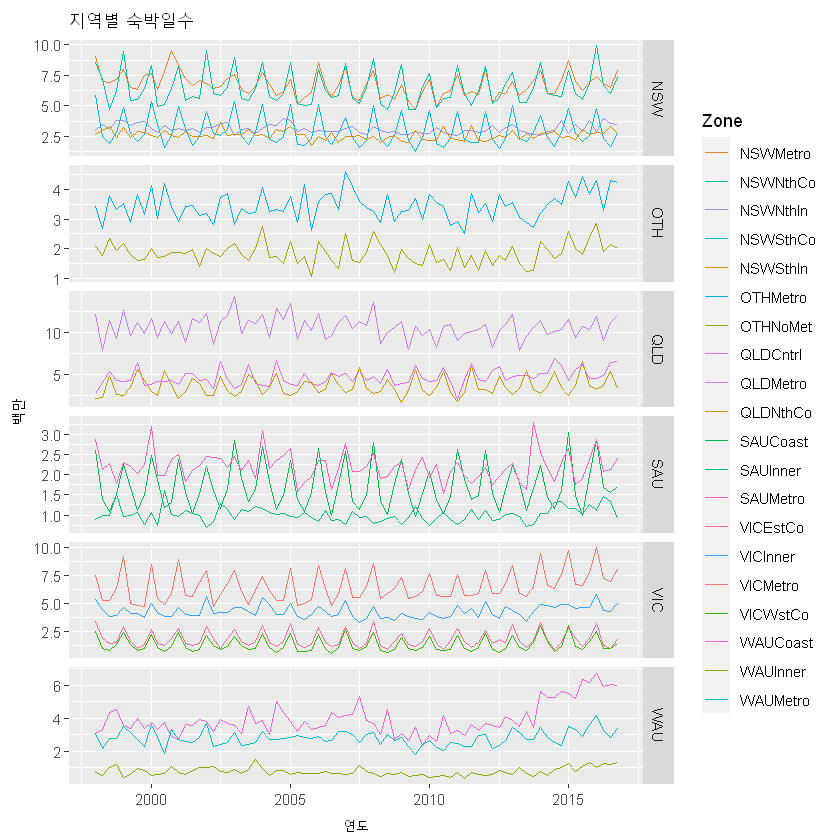

In [8]:
as_tibble(visnights) %>%
  gather(Zone) %>%
  mutate(Date = rep(time(visnights), NCOL(visnights)),
         State = str_sub(Zone,1,3)) %>%
  ggplot(aes(x=Date, y=value, group=Zone, colour=Zone)) +
    geom_line() +
    facet_grid(State~., scales="free_y") +
    xlab("연도") + ylab("백만") +
    ggtitle("지역별 숙박일수") +
    scale_colour_manual(values = cols)

<br>

## 10.02. 그룹화된 시계열

그룹화된 시계열(Grouped time series)에는 계층적 시계열보다 더 일반적인 합산 구조가 포함됩니다. 그룹화된 시계열에서, 구조는 어떤 고유한 계층을 따라 자연스럽게 나뉘지 않기도 하고, 그리고 종종 나뉜 것이 교차되거나 나뉜 것 사이에 포함관계가 나타나기도 합니다. 예를 들면, 호주 여행객 데이터의 모든 지리적 수준을 여행 목적에 따라(예를 들면, 휴가, 출장 등) 더 나눌 수 있습니다. 그래서 호주 전체에 대해, 각 주(state)에 대해, 각 지역(zone)에 대해 여행자들의 숙박 정보를 여행 목적에 따라 살펴볼 수 있습니다. 그러면, 지리적인 계층으로 “교차(crossed)”가 일어난 여행 목적을 포함하는 구조를 다루게 됩니다.

그림은 $ 
K
=
2$
 -수준 그룹화된 구조를 나타냅니다. 계층 구조의 맨 위는 전체이고 데이터 전체를 포함하는 수준입니다. 이것을 또 다시 $ 
y_
t$
 로 씁니다. 전체는 시계열 $ 
y_{A,t}$
 와  $
y_{B,t}$
 을 이루는 속성 (A, B) 또는  $
y_{X,t}$
 와  $
y_{Y,t}$
 을 이루는 속성 (X, Y)로 나눌 수 있습니다. 가장 아래 단계의 수준에서 데이터는 두 속성 모두로 나뉩니다.
 
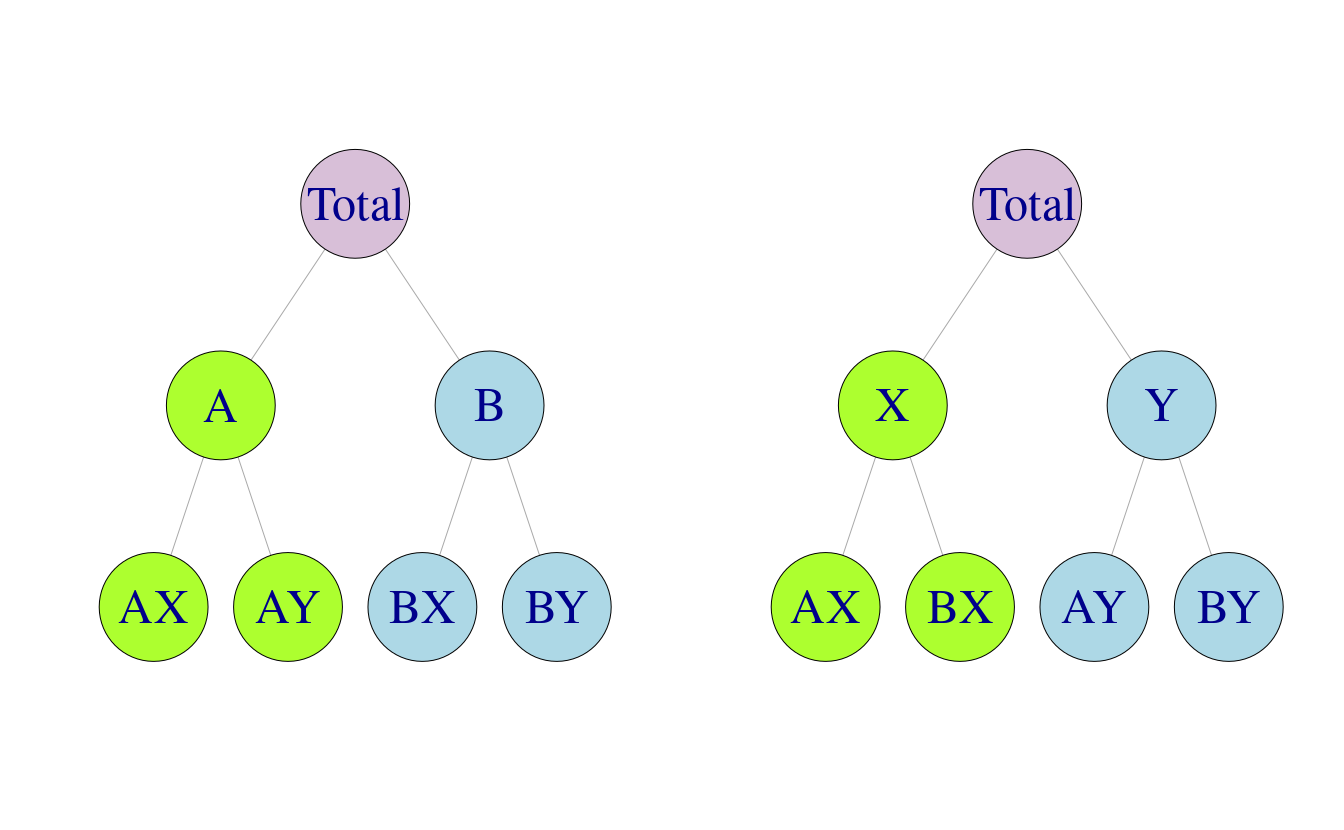

**이 예제는 그룹화된 구조에 대해서 모으는 다른 경로가 있다는 것을 나타냅니다. 어떤 시간  $t$에 대해, 계층 구조와 같이,**

$$\begin{equation*}
y_{t}=y_{AX,t}+y_{AY,t}+y_{BX,t}+y_{BY,t}.
\end{equation*}$$

하지만, 그룹화된 구조의 첫 번째 수준에 대해서는,

$$\begin{equation} y_{A,t}=y_{AX,t}+y_{AY,t}\quad \quad y_{B,t}=y_{BX,t}+y_{BY,t}
\
\end{equation}$$

but also

$$\begin{equation} y_{X,t}=y_{AX,t}+y_{BX,t}\quad \quad y_{Y,t}=y_{AY,t}+y_{BY,t}
\
\end{equation}$$

$n
×
m$
  합산행렬(summing matrix)  $
S$
 로 이러한 등식을 나타낼 수 있습니다. 전체 시계열 개수는 가장 밑바닥 단계 수준에서 $  
n_K
=
4$
 , 시계열일 때 $ 
n
=
9$
 입니다. 위 그림의 그룹화된 구조에 대해 다음과 같이 적습니다.
 
$$\begin{bmatrix}
    y_{t} \\
    y_{A,t} \\
    y_{B,t} \\
    y_{X,t} \\
    y_{Y,t} \\
    y_{AX,t} \\
    y_{AY,t} \\
    y_{BX,t} \\
    y_{BY,t}
  \end{bmatrix}
  =
  \begin{bmatrix}
    1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 0 \\
    0 & 0 & 1 & 1 \\
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
  \end{bmatrix}
  \begin{bmatrix}
    y_{AX,t} \\
    y_{AY,t} \\
    y_{BX,t} \\
    y_{BY,t}
  \end{bmatrix},$$

또는

$${y}_t={S}{b}_{t},$$

그룹화 할 수 있는 순서가 유일하지 않다는 점에서 그룹화된 시계열은 종종 유일한 계층 구조만으로 나타나지 않는 계층적 시계열로 생각할 수 있습니다.

<br>

### 10.2.0.1 예제: 호주 수감 인구

그림의 맨 윗줄은 2005년 1분기부터 2016년 4분기까지 호주 전체 수감 인구를 나타냅니다. 이 그래프는 그룹화된 구조에서 가장 꼭대기 수준의 시계열을 나타냅니다. 나머지 그래프는 수감 인구를 (i) 지역별로20 (ii) 수감자의 법적 지위별로(선고 받았거나 선고를 기다리거나), 그리고 (iii) 성별로 분배한 것입니다. 이 예제에서는 3가지 요인이 교차됩니다만, 요인 사이에 포함관계가 나타나진 않습니다.

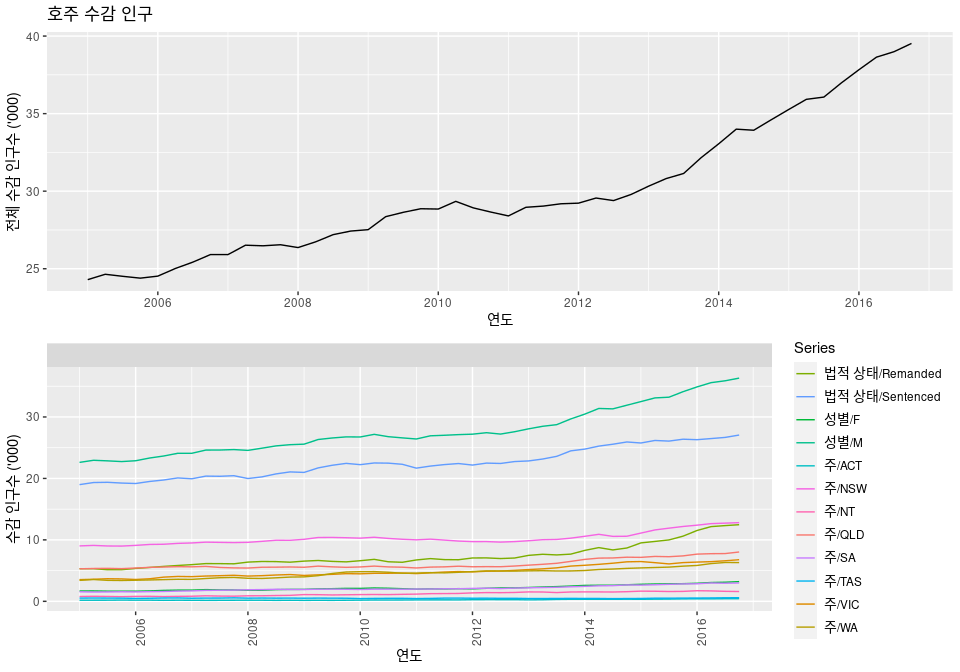

그룹화된 시계열을 만들기 위해 `gts()` 함수를 사용합니다. `hts()` 함수와 비슷하게 `gts()` 함수에 넣는 입력값은 그룹화된 구조에 관한 밑바닥 수준의 시계열과 정보입니다. `prison`은 밑바닥 수준 시계열을 포함하는 시계열 행렬입니다. `characters` 입력값을 사용하여 그룹 구조에 관한 정보를 넘길 수 있습니다. (시계열의 라벨을 더 명시적으로 두고 `groups` 입력값을 사용하는 방법도 있습니다.)

In [32]:
prison %>% dim
prison %>% as.data.frame %>% colnames
prison %>% head(1)

[1] 48 32

[1] "ACTFRemanded " "ACTFSentenced" "ACTMRemanded " "ACTMSentenced"
 [5] "NSWFRemanded " "NSWFSentenced" "NSWMRemanded " "NSWMSentenced"
 [9] "NT FRemanded " "NT FSentenced" "NT MRemanded " "NT MSentenced"
[13] "QLDFRemanded " "QLDFSentenced" "QLDMRemanded " "QLDMSentenced"
[17] "SA FRemanded " "SA FSentenced" "SA MRemanded " "SA MSentenced"
[21] "TASFRemanded " "TASFSentenced" "TASMRemanded " "TASMSentenced"
[25] "VICFRemanded " "VICFSentenced" "VICMRemanded " "VICMSentenced"
[29] "WA FRemanded " "WA FSentenced" "WA MRemanded " "WA MSentenced"

,ACTFRemanded,ACTFSentenced,ACTMRemanded,ACTMSentenced,NSWFRemanded,NSWFSentenced,NSWMRemanded,NSWMSentenced,NT FRemanded,NT FSentenced,NT MRemanded,NT MSentenced,QLDFRemanded,QLDFSentenced,QLDMRemanded,QLDMSentenced,SA FRemanded,SA FSentenced,SA MRemanded,SA MSentenced,TASFRemanded,TASFSentenced,TASMRemanded,TASMSentenced,VICFRemanded,VICFSentenced,VICMRemanded,VICMSentenced,WA FRemanded,WA FSentenced,WA MRemanded,WA MSentenced
2005 Q1,2,5,65,106,182,468,1972,6396,13,12,147,613,81,273,1000,3940,38,54,486,974,10,21,106,388,62,196,587,2689,61,210,495,2644


In [29]:
prison.gts <- gts(prison/1e3, characters = c(3,1,9),
                  gnames = c("주", "성별", "법적 상태",
                             "주*성별", "주*법적 상태", "주*법적 상태"))

주요 그룹을 나타내는 한 가지 방법은 다음과 같습니다.



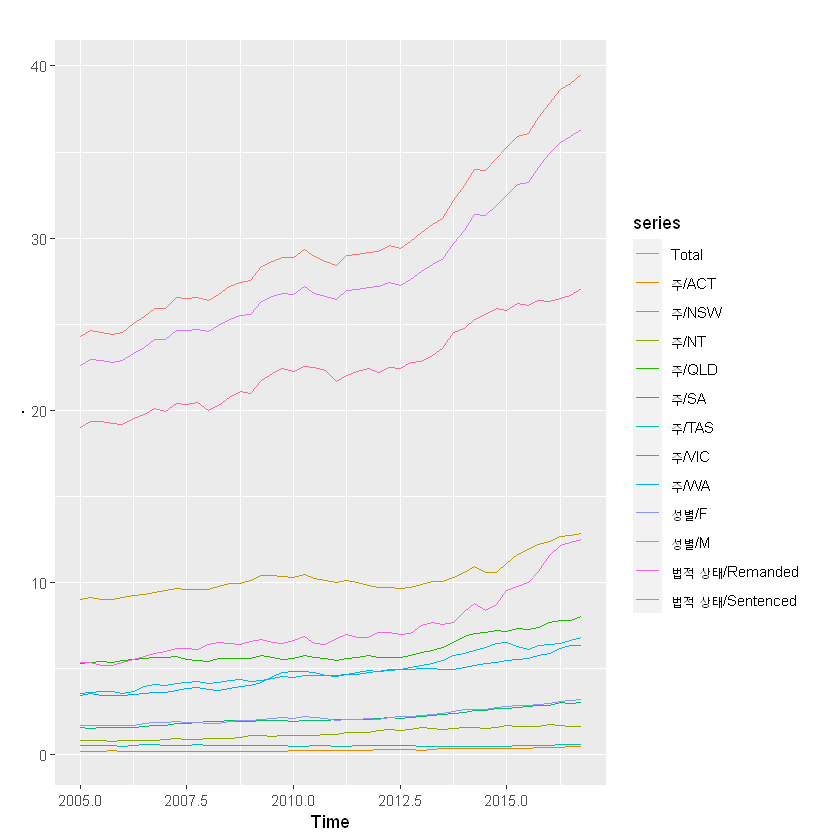

In [23]:
prison.gts %>% aggts(level=0:3) %>% autoplot()

<br>

약간 더 작업해서, 다음과 같은 코드로 그릴 수 있습니다.

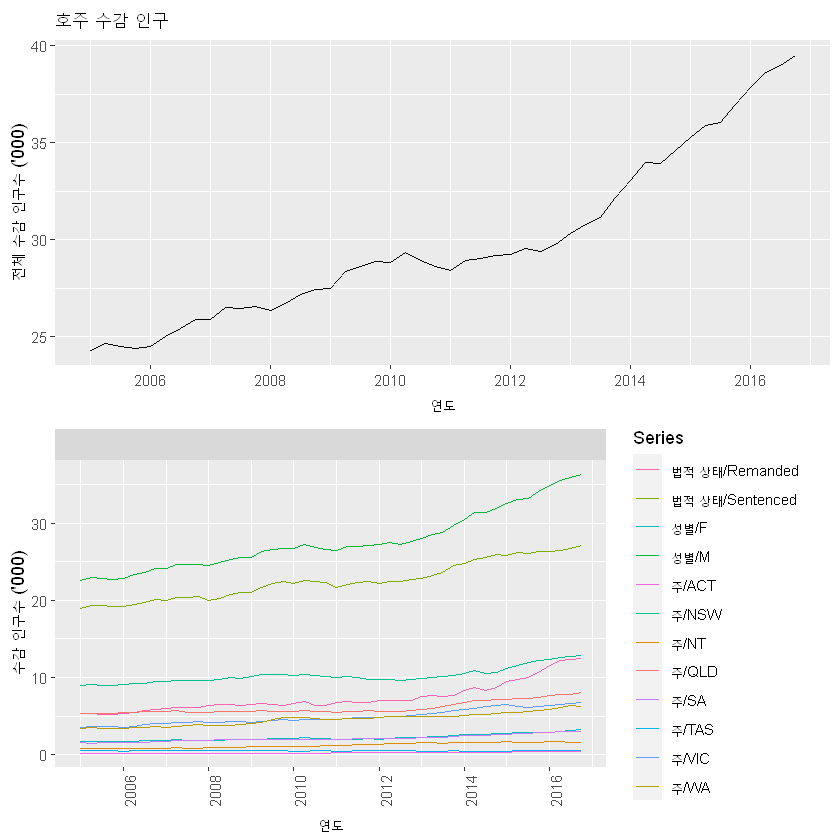

In [25]:
p1 <- prison.gts %>% aggts(level=0) %>%
  autoplot() + ggtitle("호주 수감 인구") +
    xlab("연도") + ylab("전체 수감 인구수 ('000)")

groups <- aggts(prison.gts, level=1:3)
cols <- sample(scales::hue_pal(h=c(15,375),
          c=100,l=65,h.start=0,direction = 1)(NCOL(groups)))
p2 <- as_tibble(groups) %>%
  gather(Series) %>%
  mutate(Date = rep(time(groups), NCOL(groups)),
         Group = str_extract(Series, "([A-Za-z ]*)")) %>%
  ggplot(aes(x=Date, y=value, group=Series, colour=Series)) +
    geom_line() +
    xlab("연도") + ylab("수감 인구수 ('000)") +
    scale_colour_manual(values = cols) +
    facet_grid(.~Group, scales="free_y") +
    scale_x_continuous(breaks=seq(2006,2016,by=2)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

gridExtra::grid.arrange(p1, p2, ncol=1)

<br>

다른 그룹 조합의 그래프도 비슷하게 그릴 수 있습니다. 아래 그림은 호주 수감 인구를 모든 가능한 두 가지 속성의 조합으로 분배한 것을 각각 나타냅니다. 위쪽 그래프는 수감 인구를 지역과 법적 지위로 분배한 것이고, 가운데 그래프는 지역과 성별로 분배한 것이고, 아래쪽 그래프는 법적 지위와 성별로 분배한 것입니다.

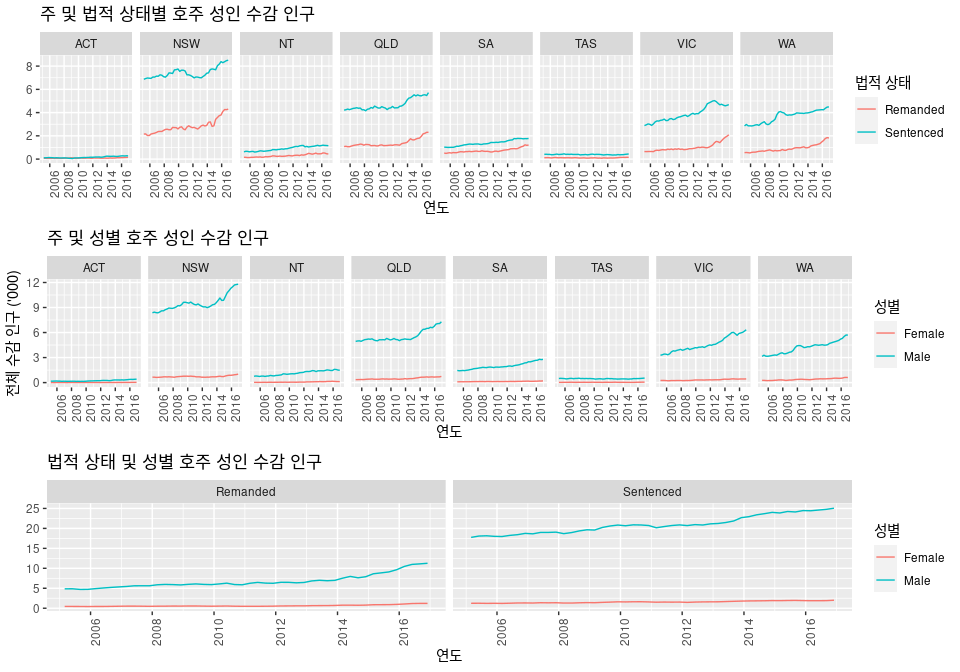

<br>

아래 그림은 호주 성인 인구를 지역, 법적 지위, 성별로 분배한 것을 나타냅니다. 이것이 호주 수감 인구에 대한 그룹화된 구조의 밑바닥 수준 시계열을 구성합니다.

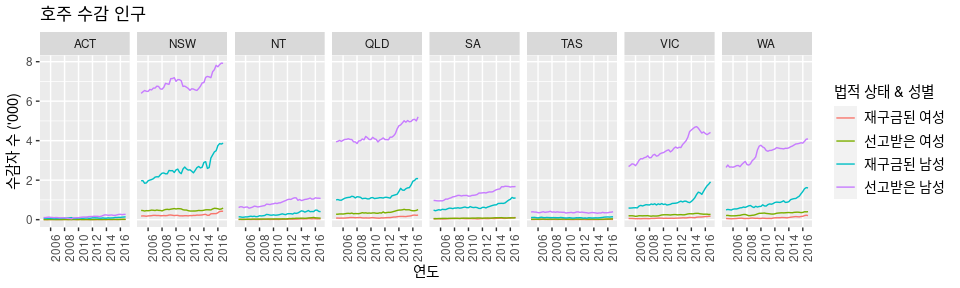

<br>

## 10.03. 상향식 접근 방식

**일관된 예측값(coherent forecast)을 내기 위해 적용하는 한 가지 단순한 기법은 상향식 접근 방식(The bottom-up approach)입니다. 이 접근 방식은 밑바닥 수준에서 각 시계열에 대해 기준 예측값을 먼저 내는 것을 포함합니다. 그리고나서 구조 안의 모든 시계열에 대해 예측값을 내기 위해 높은 단계로 가는 방향으로 더해나갑니다.**

예를 들어, 밑바닥 단계 시계열 각각에 대한  $
h$
 -단계-앞 예측값을 다음과 같이 먼저 냅니다:

$$\hat{y}_{AA,h},~~\hat{y}_{AB,h},~~\hat{y}_{AC,h},~~ \hat{y}_{BA,h}~~\text{and}~~\hat{y}_{BB,h}.$$

(간결하게 나타내기 위해 이전에 사용했던 $\hat{y}_{T+h|T}$기호로 단순하게 적었습니다.) 이 값들을 더하여, 나머지 시계열에 대한  $
h$
 -단계-앞 일관된 예측값(coherent forecast)을 얻습니다:
 
$$\begin{align*}
  \tilde{y}_{h} & =\hat{y}_{AA,h}+\hat{y}_{AB,h}+\hat{y}_{AC,h}+\hat{y}_{BA,h}+\hat{y}_{BB,h}, \\
  \tilde{y}{A,h} & = \hat{y}_{AA,h}+\hat{y}_{AB,h}+\hat{y}_{AC,h}, \\
\text{and}\quad
  \tilde{y}{B,h} &= \hat{y}_{BA,h}+\hat{y}_{BB,h}.
\end{align*}$$

(이 장에서는 일관된 예측값을 나타낼 때 “틸다(tilde)” 기호를 사용하겠습니다.)
합산행렬(summing matrix)을 도입하여 다음과 같이 쓸 수 있습니다.

$$\begin{bmatrix}
    \tilde{y}_{h} \\
    \tilde{y}_{A,h} \\
    \tilde{y}_{AA,h} \\
    \tilde{y}_{AB,h} \\
    \tilde{y}_{AC,h} \\
    \tilde{y}_{BA,h} \\
    \tilde{y}_{BB,h}
  \end{bmatrix}
  =
  \begin{bmatrix}
    1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 & 1 \\
    1  & 0  & 0  & 0  & 0  \\
    0  & 1  & 0  & 0  & 0  \\
    0  & 0  & 1  & 0  & 0  \\
    0  & 0  & 0  & 1  & 0  \\
    0  & 0  & 0  & 0  & 1
  \end{bmatrix}
  \begin{bmatrix}
    \hat{y}_{AA,h} \\
    \hat{y}_{AB,h} \\
    \hat{y}_{AC,h} \\
    \hat{y}_{BA,h} \\
    \hat{y}_{BB,h}
  \end{bmatrix}.$$

<br>

### R의 `hts` 패키지

**`forecast()` 함수를 이용하여 `hts()` 또는 `gts()`로 만든 객체에 적용하여 예측값을 낼 수 있습니다. hts 패키지에는 예측값을 내기 위한 내장된 옵션이 3가지 있습니다: ETS 모델, ARIMA 모델이나 확률보행(random walk) 모델;**

이러한 모델을 `fmethod` 입력값으로 조절할 수 있습니다. 일관된 예측값을 내기 위한 몇 가지 방법도 사용합니다. 이러한 방법은 method 입력값으로 조절할 수 있습니다.

예를 들어, 수감자 데이터에 ARIMA 모델을 적용하여 낸 상향식 예측값이 필요하다고 해봅시다. 그러면 다음과 같은 내용을 사용할 수 있습니다.

* 이 코드가 시계열 묶음에 있는 밑바닥 수준 시계열 각각에 `auto.arima()` 함수를 적용할 것입니다. `fmethod="ets"`을 사용하면 비슷하게 ETS 모델도 사용될 것입니다.

In [33]:
forecast(prison.gts, method="bu", fmethod="arima")

Grouped Time Series 
8 Levels 
Number of groups at each level: 1 8 2 2 16 16 4 32 
Total number of series: 81 
Number of observations in each historical series: 48 
Number of forecasts per series: 8 
Top level series of forecasts: 
         Qtr1     Qtr2     Qtr3     Qtr4
2017 40.06526 40.45023 40.64937 41.02091
2018 41.54746 41.86811 42.10515 42.57171

<br>

## 10.04. 하향식 접근 방식

**하향식 접근 방식들(Top-down approaches)은 그룹화된 구조에서는 쓸 수 없고, 엄밀한 계층 합산 구조에서만 쓸 수 있습니다. 하향식 접근 방식에서는 먼저 전체 시계열  $
y_
t$
 에 대해 예측값을 내고, 그 다음에 계층 구조를 따라 나눠나갑니다.**
 
**$p_1,\dots,p_{m}$을 “전체(Total)” 시계열의 예측값이 어떻게 분배되는지 나타내는 분배비율(disaggregation proportion)의 집합이라고 둡시다. 합산 구조의 밑바닥 수준에서 각 시계열에 대해 예측값을 얻기 위해 분배비율의 집합이 필요합니다.**


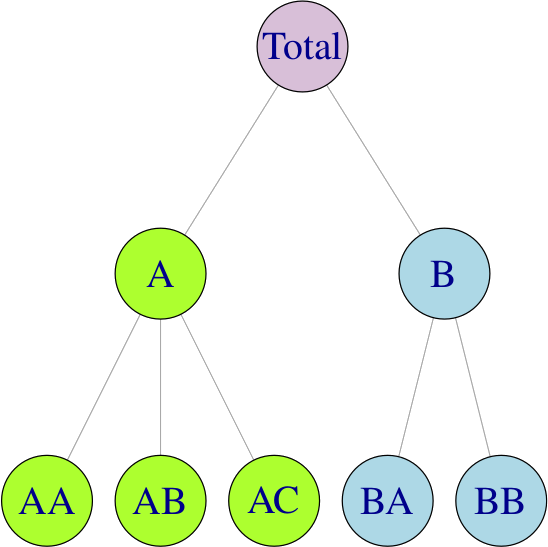

예를 들면 위의 그림의 계층 구조에 대해 비율값  $p_1,\dots,p_{5}$ 을 사용하면 다음과 같은 식을 얻습니다.


$$\tilde{y}_{AA,t}=p_1\hat{y}_t,~~~\tilde{y}_{AB,t}=p_2\hat{y}_t,~~~\tilde{y}_{AC,t}=p_3\hat{y}_t,~~~\tilde{y}_{BA,t}=p_4\hat{y}_t~~~\text{and}~~~~~~\tilde{y}_{BB,t}=p_5\hat{y}_t.$$

행렬 표기법을 가지고  $
m$
 -차원 벡터  $
p
=
(
p
1
,
…
,
p
m
)
′$
 에서의 비율값을 모을 수 있고, 다음과 같이 적습니다.
 
$$\tilde{{b}}_{t}={p}\hat{y}_t.$$

밑바닥 수준의  $
h$
 -단계 앞 예측값을 내면, 나머지 시계열에 대한 일관된 예측값을 내기 위해 이 값들을 계층 구조에서 합산합니다. 일반적으로 특정한 비율값의 집합에 대해 하향식 접근 방식을 다음과 같이 쓸 수 있습니다.
 
$$\tilde{{y}}_h={S}{p}\hat{y}_t.$$

가장 흔한 하향식 접근 방식 두 가지에서는 데이터의 과거 분배비율값에 근거하여 비율을 정합니다. 이러한 방식들은 Gross & Sohl (1990) 의 연구에서 잘 작동했습니다.



<br>

### 과거 비율값을 평균하기

$j=
1
,
…
,
m$
 에 대해,
 
$$p_j=\frac{1}{T}\sum_{t=1}^{T}\frac{y_{j,t}}{{y_t}}$$

입니다. 각 비율  $
p_
j$
 은 전체 합산치  $
y_
t$
 에 관하여 기간  $
t
=
1
,
…
,
T$
 에 따라 밑바닥 수준 시계열  $
y_{
j
,
t}$
 의 과거 비율값의 평균을 반영합니다.

forecast() 함수에서 `method="tdgsf"`로 두고 이 방식을 구현합니다. 여기에서 `tdgsf`는 “top-down Gross-Sohl method A”의 약자입니다.

<br>

### 과거 평균값의 비율

$j
=
1
,
…
,
m$
 에 대해,
 
$$p_j={\sum_{t=1}^{T}\frac{y_{j,t}}{T}}\Big/{\sum_{t=1}^{T}\frac{y_t}{T}}$$

입니다. 각 비율  $
p_
j$
 은 전체 합산치  $
y_
t$
 의 평균값에 관하여 밑바닥 수준 시계열  $
y_{
j
,
t}$
 의 평균 과거값을 잡아냅니다. forecast() 함수에서 다음과 같이 `method="tdgsf"`로 두고 이 접근 방식을 구현합니다. 여기에서 `tdgsf`는 “top-down Gross-Sohl method F”의 약자입니다.

이러한 하향식 접근 방식의 장점은 단순하다는 것입니다. 꼭대기 수준 시계열에 대해 모델링하고 예측값을 내야할 필요만 있다고 합시다. 일반적으로 이러한 접근 방식은 합산 수준에 대한 꽤 신뢰할만한 예측값을 내는 것처럼 보이고 수효를 센 값이 작은 데이터를 다룰 때 유용합니다. 반면에, 한 가지 단점은 합산 과정 때문에 정보 손실이 있다는 것입니다. 이러한 하향식 접근 방식으로는, 시간 동역학이나 특별한 사건 같은 시계열 각각의 속성(attribute)의 장점을 잡아내거나 고려할 수 없습니다.

<br>

### 예측 비율값

**분배에 사용된 과거 비율은 이러한 비율이 시간에 따라서 변할 수도 있다는 것을 고려하지 못하기 때문에, 과거 비율에 근거한 하향식 접근 방식은 상향식 접근 방식에 비해 계층 구조에서 수준이 낮아질 수록 덜 정확한 예측값을 내는 경향이 있습니다. 이 문제를 다루기 위해, 과거 데이터 대신에 예측값에 근거한 비율을 사용할 수 있습니다 (Athanasopoulos, Ahmed, & Hyndman, 2009).**

**계층 구조에서 한 수준을 생각해 봅시다. 먼저 모든 시계열에 대해  $
h$
 -단계-앞 예측값을 냅니다. 이러한 예측값을 직접적으로 사용하지 않습니다. 그리고 이러한 예측값은 일관되지 않습니다(올바른 방식으로 더한 것이 아니기 때문에). 이것을 “초기(initial)” 예측값이라고 부릅시다. 밑바닥 수준에서 각  $
h$
 -단계-앞 초기 예측값의 비율을 가지고 이 수준에서의  $
h$
 -단계-앞 모든 초기 예측값의 합산값까지 계산합니다. 이것을 예측비율(forecast proportion)이라고 부르고, 꼭대기 수준의  $
h$
 -단계-앞 초기 예측값을 분배하기 위해 사용합니다. 이렇게 사용하는 목적은 전체 계층 구조에 대해 일관된 예측값을 내기 위해서 입니다.**
 
$K$
 -수준 계층 구조에 대해 꼭대기부터 밑바닥까지 가는 각 마디에 대해 이 과정을 반복합니다. 이 과정을 적용하여 예측비율값(forecast proportion)을 얻기 위한 다음과 같은 일반적인 규칙을 얻습니다.
 
$$p_j=\prod^{K-1}_{\ell=0}\frac{\hat{y}_{j,h}^{(\ell)}}{\hat{S}_{j,h}^{(\ell+1)}}$$

여기에서  $
j
=
1
,
2
,
…
,
m$
 이고,  $\hat{y}_{j,h}^{(\ell)}$
 은 마디  $
j$
  위의  $
ℓ$
  수준인 마디와 관련된 시계열의  $
h$
 -단계-앞 초기 예측값이고,  $\hat{S}_{j,h}^{(\ell)}$
 은 마디  $
j$
  위의  $
ℓ$
  수준인 마디 아래와 해당 마디에 직접적으로 연결된 마디 아래의 $ 
h$
 -단계-앞 초기 예측값의 합입니다. 이러한 예측 비율값은 “전체” 시계열의$  
h$
 -단계-앞 기준 예측값을 밑바닥 수준 시계열의  $
h$
 -단계-앞 일관된 예측치로 분리합니다.

이 표기법을 설명하기 위해 그리고 이 일반적인 규칙을 어떻게 얻는지 나타내기 위해 그림 10.1의 계층 구조를 이용할 것입니다. 계층 구조에서 각 시계열에 대해 초기 예측값을 냈다고 가정합시다. 어떤 하향식 접근 방식에 대해 꼭대기 수준의 “전체” 시계열에 대해  $\tilde{y}_{h}=\hat{y}_{h}$ 라는 것을 떠올려봅시다. 위의 표기법을 사용하는 몇 가지 예제를 살펴보겠습니다.

* $\hat{y}_{\text{A},h}^{(1)}=\hat{y}_{\text{B},h}^{(1)}=\hat{y}_{h}= \tilde{y}_{h}$

* $\hat{y}_{\text{AA},h}^{(1)}=\hat{y}_{\text{AB},h}^{(1)}=\hat{y}_{\text{AC},h}^{(1)}= \hat{y}_{\text{A},h}$
* $\hat{y}_{\text{AA},h}^{(2)}=\hat{y}_{\text{AB},h}^{(2)}= \hat{y}_{\text{AC},h}^{(2)}=\hat{y}_{\text{BA},h}^{(2)}= \hat{y}_{\text{BB},h}^{(2)}=\hat{y}_{h}= \tilde{y}_{h}$

* $\hat{S}_{AA,h,1} = \hat{S}_{AB,h,1}= \hat{S}_{AC,h,1}= \hat{y}_{AA,h}+\hat{y}_{AB,h}+\hat{y}_{AC,h}$
* $\hat{S}_{AA,h,2} = \hat{S}_{AB,h,2}= \hat{S}_{AC,h,2}= \hat{S}_{A,h,1} = \hat{S}_{B,h,1}= \hat{S}_{h}= \hat{y}_{A,h}+\hat{y}_{B,h}$

계층 구조의 가장 왼쪽으로 이동하면 일관된 예측값은 다음과 같이 주어집니다.

$$\tilde{y}_{A,h} = \Bigg(\frac{\hat{y}_{A,h}}{\hat{S}^{(1)}_{A,h}}\Bigg) \tilde{y}_{h} =
  \Bigg(\frac{\hat{y}_{AA,h}^{(1)}}{\hat{S}^{(2)}_{AA,h}}\Bigg) \tilde{y}_{h}$$

  


그리고

$$\tilde{y}_{AA,h} = \Bigg(\frac{\hat{y}_{AA,h}}{\hat{S}_{AA,h,1}}\Bigg) \tilde{y}_{A,h}
  =\Bigg(\frac{\hat{y}_{AA,h}}{\hat{S}^{(1)}_{AA,h}}\Bigg) \Bigg(\frac{\hat{y}_{AA,h}^{(1)}}{\hat{S}^{(2)}_{AA,h}}\Bigg)\tilde{y}_{h}$$

결과적으로,

$$p_1=\Bigg(\frac{\hat{y}_{AA,h}}{\hat{S}^{(1)}_{AA,h}}\Bigg) \Bigg(\frac{\hat{y}^{(1)}_{AA,h}}{\hat{S}^{(2)}_{AA,h}}\Bigg).$$

다른 비율값을 비슷하게 얻을 수 있습니다.

모든 하향식 예측 방식의 한 가지 단점은 (Hyndman, Ahmed, Athanasopoulos, & Shang, 2011) 에서 보인 것처럼 예측값이 편향이 없는 일관된 예측값을 내지 않는다는 것입니다.

`forecast()` 함수에서 다음과 같이 `method="tdfp"`로 두고 이 접근 방식을 구현합니다. 여기에서 `tdfp` 는 “top-down forecast proportions”의 약자입니다.

<br>

## 10.05. 중간 접근 방식

중간 접근 방식(Middle-out approach)은 상향식(bottom-up)과 하향식(top-down) 접근 방식을 결합한 것입니다. 먼저, “중간 수준(middle level)”을 고르고 이 수준의 모든 시계열에 대해 예측값을 냅니다. 중간 수준 위의 시계열에 대해서는, “중간-수준” 예측값을 위 방향으로 합산하는 상향 접근 방식으로 일관된 예측값을 냅니다. “중간 수준” 아래의 시계열에 대해서는, “중간 수준” 예측값을 아래 방향으로 합산하는 하향 접근 방식으로 일관된 예측값을 냅니다. 중간 수준 아래에서 하향식 분배에 대해, 하향식 예측비율을 사용합니다.

`forecast()` 함수에서 다음과 같이 `method="mo"`로 두고 level 입력값을 통해 적절한 중간 수준을 정해서 이 접근 방식을 구현합니다.

<br>

## 10.06. 사상 행렬

지금까지 고려한 모든 기법은 공통적인 표기법으로 나타낼 수 있습니다.

합산 제약조건을 무시하고 모든 시계열을 독립적으로 예측하는 상황을 생각해봅시다. 이것들을 기준 예측(base forecasts)값이라고 부르고  $\hat{y}_h$
 라고 씁시다. 여기에서  $
h$
 는 예측수평선(forecast horizon)입니다. 이것은 데이터  $
y_
t$
 와 같은 순서로 쌓입니다.
 
그러면 계층적이거나 그룹화된 구조에 대한 모든 예측 접근 방식은 일반적으로 다음과 같이 쓸 수 있습니다.

$$\begin{equation}
  \tilde{{y}}_h={S}{P}\hat{{y}}_h,
  \
\end{equation}$$

여기에서  $
P$
 은 기준 예측값을 밑바닥 수준으로 투영하는 행렬이고, 합산 행렬  $
S$
 은 일관된 예측값  $
\hat{y}_
h$
 의 집합을 내기 위해 합산 구조를 이용하여 합산합니다.

행렬  $
P$
 은 구현한 접근 방식에 따라 정의됩니다. 예를 들어 그림 10.1의 계층 구조를 예측하는데 상향식 접근 방식을 사용한다면,
 
$${P}=
    \begin{bmatrix}
      0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
      0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
      0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
      0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
    \end{bmatrix}.$$
    
$P$는 두 부분을 포함한다는 것에 주목합시다. 처음 3개의 열에서 밑바닥 수준 위에 있는 시계열의 기준 예측값은 0이고, $
m$
 차원 항등 행렬(identity matrix)은 밑바닥 수준의 기준 예측값만 고릅니다. 이것들은  $
S$
  행렬로 더합니다.
  
하향식 접근 방식 중의 어떤 하나를 사용했다면,

$${P}=
    \begin{bmatrix}
      p_1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
      p_2 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
      p_3 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
      p_4 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
      p_5 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    \end{bmatrix}.$$

첫 번째 열은 행렬  $
S$
 로 계층 구조가 합산되게 하기 위해 꼭대기 수준의 기준 예측값을 밑바닥 단계로 분배하는 비율을 포함합니다. 나머지 행은 합산의 가장 높은 수준 아래의 기준 예측값을 0으로 하도록 다음과 같이 씁니다.

중간 접근 방식에서는  $
P$
  행렬은 위의 두 가지의 조합이 될 것입니다. 비율값을 이용하면, 몇몇의 미리 고른 수준의 기준 예측값은 밑바닥 수준으로 분리될 것이고, 다른 모든 기준 예측값은 0이 될 것이며, 밑바닥 수준의 예측값은 합산 행렬을 통해 더해질 것입니다.

<br>

### 예측 조정

식 $\begin{equation}
  \tilde{{y}}_h={S}{P}\hat{{y}}_h,
  \
\end{equation}$다음과 같이 다시 쓸 수 있습니다.

$$\begin{equation}
  \tilde{{y}}_h={R}\hat{{y}}_h,
  \
\end{equation}$$

여기에서  $
R
=
S
P$
 은 “조정 행렬(reconciliation matrix)”입니다. 즉, 일관되지 않은 기준 예측값  $
\hat{y}_h$
 을 조정하여 일관된 예측값  $
\tilde{y}_h$
 을 내도록 합니다.

지금까지 다룬 기법에서는, 실제적인 조정이 이뤄지지 않았습니다. 왜냐하면 합산 구조에서 한 수준의 예측값에 근거한 기법이기 때문입니다. 즉, 다른 모든 수준에서 예측값을 얻기 위해 합산하거나 분배한 경우만 다룬 것입니다. 하지만, 일반적으로는, 다른 행렬$  
P$
 을 사용할 수 있습니다. 그리고 일관된 예측값을 내도록  $
R$
 이 모든 기준 예측값을 결합하고 조정할 것입니다.

사실, 가장 정확한 조정 예측값을 얻기 위한 최적 행렬  $
P$
 을 찾을 수 있습니다.

<br>

## 10.07. 최적 조정 접근법

일관된 예측값에서 예측 오차를 최소화하는  $
G$
  행렬을 찾을 수 있다면, 최적 예측 조정(optimal forecast reconciliation)이 나타날 것입니다. 여기에서는 이 접근 방식을 간단하게 요약하여 설명하겠습니다. 자세한 내용은 Wickramasuriya et al. (2019) 에 있습니다.

$\begin{equation}
  \tilde{{y}}_h={R}\hat{{y}}_h,
  \
\end{equation}$을 이용하여 일관된 예측값을 내는 상황을 생각해봅시다. 편의상 여기에서 이 상황을 반복하였습니다:

$$\begin{equation}
  \tilde{{y}}_h={R}\hat{{y}}_h,
  \
\end{equation}$$

먼저 편향되지 않은 예측값을 얻었는지 확인할 필요가 있습니다. 기준 예측값  $\hat{{y}}_h$이 편향되지 않았다면, 일관된 예측값(coherent forecast)  $\tilde{{y}}_h$
 이 편향되지 않을 것이고  $
S
G
S
=
S$
  로 주어집니다 (Hyndman et al., 2011). 이것이 행렬  $
G$
 에 대한 제약 조건을 줍니다. 재미있게도, 모든 하향식 기법(top-down)은 이 제약 조건을 만족하지 않아서, 모든 하향식 기법은 편향됩니다.

다음, 예측값에서 오차를 찾을 필요가 있습니다. Wickramasuriya et al. (2019) 에서는$  
h$
 -단계-앞 일관된 예측 오차(coherent forecast error)의 분산-공분산(variance-covariance) 행렬이 다음과 같이 주어지는 것을 보였습니다.
 
$$\begin{equation*}
{V}_h = \text{Var}[{y}_{T+h}-\tilde{{y}}_h]={S}{G}{W}_h{G}'{S}'
\end{equation*}$$

여기에서 ${W}_h=\text{Var}[({y}_{T+h}-\hat{{y}}_h)]$는 관련된 기준 예측 오차(base forecast error)의 분산-공분산 행렬입니다.

목표는 수정된 예측값의 오차 분산을 최소화하는 최적 행렬  $
G$
 을 찾는 것입니다. Wickramasuriya et al. (2019) 는  $
V_
h$
 의 대각합(trace)을 최소화하는  $
S
G
S
=
S$
 인 최적 행렬  $
G$
 이 다음과 같이 주어지는 것을 보였습니다.

$${G}=({S}'{W}_h^{-1}{S})^{-1}{S}'{W}_h^{-1}.$$

따라서 최적으로 조정된 예측값(optimal reconciled forecasts)은 다음과 같이 주어집니다.

$$\begin{equation}
\
  \tilde{{y}}_h={S}({S}'{W}_h^{-1}{S})^{-1}{S}'{W}_h^{-1}\hat{{y}}_h.
\end{equation}$$

이것을 MinT (또는 최소 대각합-Minimum Trace) 추정값으로 부르겠습니다.

이것을 실제로 사용하기 위해, $
h$
 -단계-앞 기준 예측값의 예측 오차 분산인  $
W_
h$
 을 추정해야 합니다. 이것은 어려운 작업일 수 있습니다. 그래서 시뮬레이션과 실제 상황 두 경우에서 모두 잘 작동한다고 알려진 4가지 근사 기법을 소개하려고 합니다.


1. ${W}_h=k_h{I}$로 둡시다. 여기에서 $k_{h} > 0$입니다. 이것은 만들기 위해 가장 단순화한 가정입니다. 내용은 다음과 같습니다.$P$는 데이터와 관계 없다고 하여 상당한 계산량을 줄일 수 있도록 합니다. 하지만, 단점은 구조의 수준 사이의 눈금 차이나 시계열 사이의 관계를 고려하지 못한다는 것입니다. 이 방식은 `forecast()` 함수에서 `method = "comb"`와 `weights = "ols"`로 두고 구현합니다.

    $\begin{equation}
    \
      \tilde{{y}}_h={S}({S}'{W}_h^{-1}{S})^{-1}{S}'{W}_h^{-1}\hat{{y}}_h.
    \end{equation}$에서 ${W}_h=k_h{I}$로 두면 5.7 절에서 $X
=
S$
  와 ${y}=\hat{{y}}$로 소개했던 최소 제곱 추정량이 되기 때문에, 여기에서 가중치를 OLS(ordinary least square; 보통의 최소 제곱) 로 부릅니다. 

2. 모든  $
h$
 에 대해 ${W}_{h} = k_{h}\text{diag}(\hat{{W}}_{1})$ 로 둡시다. 여기에서 $k_{h} > 0$이고,
 
$$\hat{{W}}_{1} = \frac{1}{T}\sum_{t=1}^{T}{e}_{t}{e}_{t}',$$

    입니다. 그리고 $e_t$는 데이터와 동일한 순서로 누적된 기준 예측값을 낸 모델의 잔차의 $n$-차원 벡터입니다. forecast() 함수로 method = "comb"와 weights = "wls"로 두고 이 방식을 구현합니다.
    
    잔차의 분산을 가지고 기준 예측값의 눈금을 맞춥니다. 그래서 이것을 분산 눈금 잡기(variance scaling) 방법이라고 부릅니다.

3. 모든  $
h$
 에 대해  $
W_
h
=
k_
h
Λ$
 로 두고 여기에서  $
k_
h
>
0$
 이고,  $
Λ
=
diag
(
S
1
)$
 로 둡시다.  $
1$
 은 차원  $
m$
  (밑바닥 수준 시계열의 수)의 단위 벡터입니다. 이 방법에서는 밑바닥 수준(bottom-level) 기준예측(base forecast) 오차 각각이 분산  $
k_
h$
 를 갖고 마디(node) 사이에 상관관계(correlation)가 없다는 것을 가정합니다. 따라서 $ 
Λ$
  행렬의 대각성분(diagonal element) 각각은 각 마디에 기여하는 예측 오차 분산의 수를 포함합니다. 이 추정량은 실제 데이터에 의존하지 않고, 합산 구조에만 의존합니다. 따라서 이 방법을 구조적 눈금 잡기(structural scaling)라고 부릅니다. 
  
  구조적 눈금 잡기를 적용하면 잔차(residual)를 구할 수 없는 경우에 특히 유용합니다. 따라서 분산 눈금잡기를 사용할 수 없습니다. 판단 예측(4 장)으로 낸 기준 예측값이 이와 같은 상황이 적용되는 예가 되겠습니다. 이 방법은 `method = "comb"`와 `weights = "nseries"`로 두고 구현합니다.
  
4. 모든  $
h$
 에 대해  $
W_
h
=
k_
h
W_
1$
 로 둡시다. 여기에서  $
k_
h
>
0$
 입니다. 여기에서는 오차 공분산 행렬(error covariance matrix)이 서로 비례한다고만 가정합니다. 전체 1단계 공분산 행렬  $
W_
1$
 을 직접 계산합니다. 가장 분명하고 단순한 방법은 표본 공분산(sample covariance)을 사용하는 것입니다. 이 방식은 `forecast()` 함수에서 `method = "comb"`, `weights = "mint"`, `covariance = "sam"`로 두고 구현합니다.

하지만, 밑바닥 수준 시계열의 수  $
m$
 이 시계열의 길이  $
T$
 에 비해 큰 경우에는, 이것은 좋은 추정량이 아닙니다. 대신에 표본 공분산을 대각행렬로 만드는 축소추정량(shrinkage estimator)을 사용합니다. 이것은 `method = "comb"`, `weights = "mint"`, `covariance = "shr"`로 두고 구현합니다.
 
정리하면, 존재하는 다른 기법과는 다르게, 최적 조정 예측값(optimal reconciliation forecast)은 계층적 구조 또는 그룹화된 구조 안에 있는 모든 사용 가능한 정보를 가지고 냅니다. 이 차이는 중요합니다. 특정한 합산 수준이나 그룹이, 사용자가 관심 있어 할 그리고 모델링 과정에서 중요하게 사용될 수 있는 데이터의 특징을 나타낼 수 있기 때문입니다.

호주 여행자 데이터를 살펴봅시다. 여기에서는 계층 구조가 국가의 지리적인 구분 즉, 주와 지역으로 나타납니다. 몇몇 해안가 지역은 여름 휴양지로 유명해서 몰릴 것이지만, 몇몇 산악 지역은 겨울 휴양지로 몰릴 것입니다. 이러한 차이는 합산하면 국가 수준에서는 묻힐 것입니다.

<br>

### 예제: 호주 수감 인구 예측

10.2 절에서 다룬 호주 수감 인구에 대한 예측값을 계산해보겠습니다. forecast() 함수의 기본 입력값을 사용하여, 분산 눈금을 사용하는 WLS 추정량과 최적 조정 접근법을 이용하여 일관된 예측값을 계산하겠습니다.

In [34]:
prisonfc <- forecast(prison.gts)

합산의 각 수준에 대한 예측값을 얻기 위해, `aggts()` 함수를 사용할 수 있습니다. 예를 들면, 종합적인 전체 수감 인구와 1개 요인에 대한(주, 성별, 법적 상태) 예측값을 계산하기 위해, 다음을 이용합니다:



In [35]:
fcsts <- aggts(prisonfc, levels=0:3)

다음과 같은 내용을 이용하여 단순한 그래프를 얻습니다.



In [36]:
groups <- aggts(prison.gts, levels=0:3)

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.



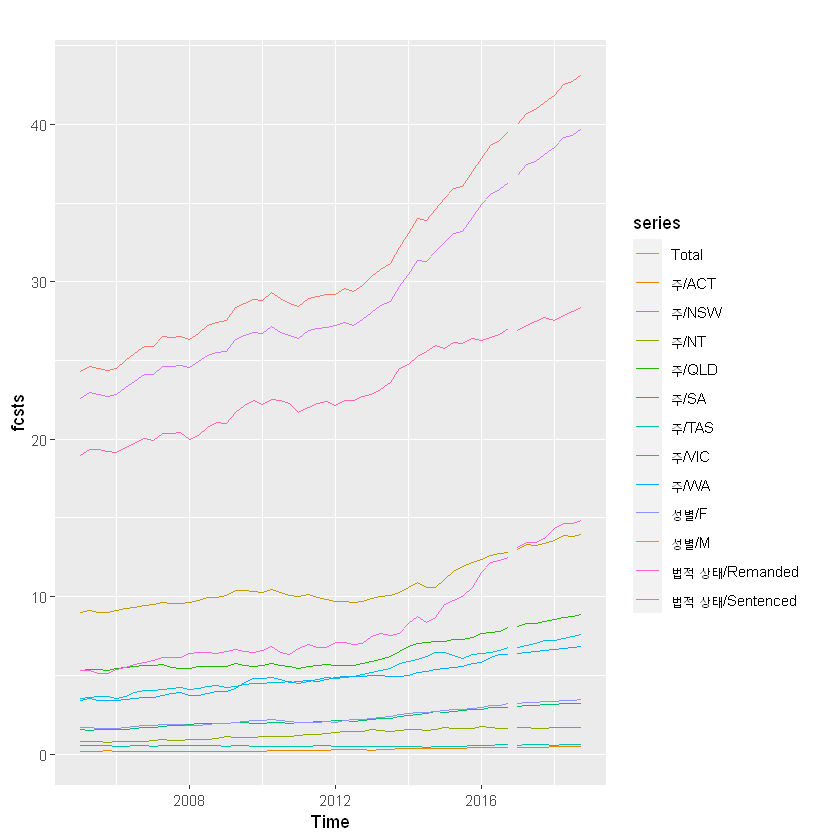

In [37]:
autoplot(fcsts) + autolayer(groups)

다음의 코드를 이용하여 더 나은 그래프를 얻을 수 있습니다. 결과는 그림 10.8 에 있습니다. 수직 선은 예측 시기의 시작을 나타냅니다.




In [38]:
prisonfc <- ts(rbind(groups, fcsts),
  start=start(groups), frequency=4)

p1 <- autoplot(prisonfc[,"Total"]) +
  ggtitle("호주 수감 인구") +
  xlab("연도") + ylab("전체 수감자 수 ('000)") +
  geom_vline(xintercept=2017)

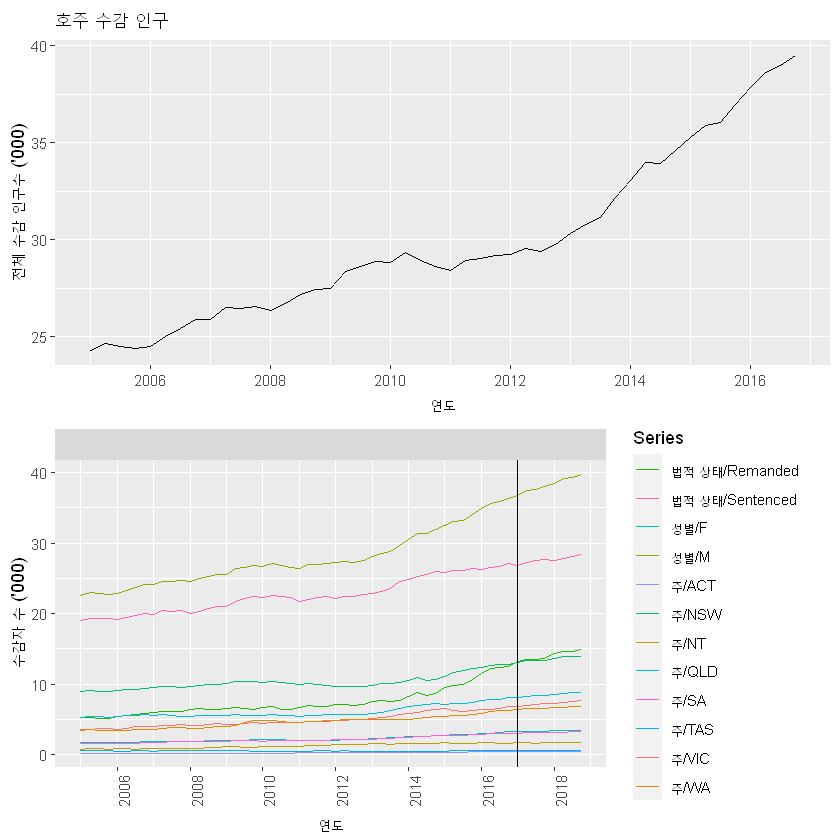

In [39]:
cols <- sample(scales::hue_pal(h=c(15,375),
          c=100,l=65,h.start=0,direction = 1)(NCOL(groups)))

p2 <- as_tibble(prisonfc[,-1]) %>%
  gather(Series) %>%
  mutate(Date = rep(time(prisonfc), NCOL(prisonfc)-1),
         Group = str_extract(Series, "([A-Za-z ]*)")) %>%
  ggplot(aes(x=Date, y=value, group=Series, colour=Series)) +
    geom_line() +
    xlab("연도") + ylab("수감자 수 ('000)") +
    scale_colour_manual(values = cols) +
    facet_grid(. ~ Group, scales="free_y") +
    scale_x_continuous(breaks=seq(2006,2018,by=2)) +
    theme(axis.text.x = element_text(angle=90, hjust=1)) +
    geom_vline(xintercept=2017)

gridExtra::grid.arrange(p1, p2, ncol=1)

<br>

아래 그림을 그리는데 비슷한 코드를 사용했습니다. 왼쪽 패널은 주와 성별 사이의 상호작용에 대한 일관된 예측값(coherent forecast)을 나타냅니다. 오른쪽 패널은 밑바닥 수준(bottom-level) 시계열에 대한 예측값을 나타냅니다.

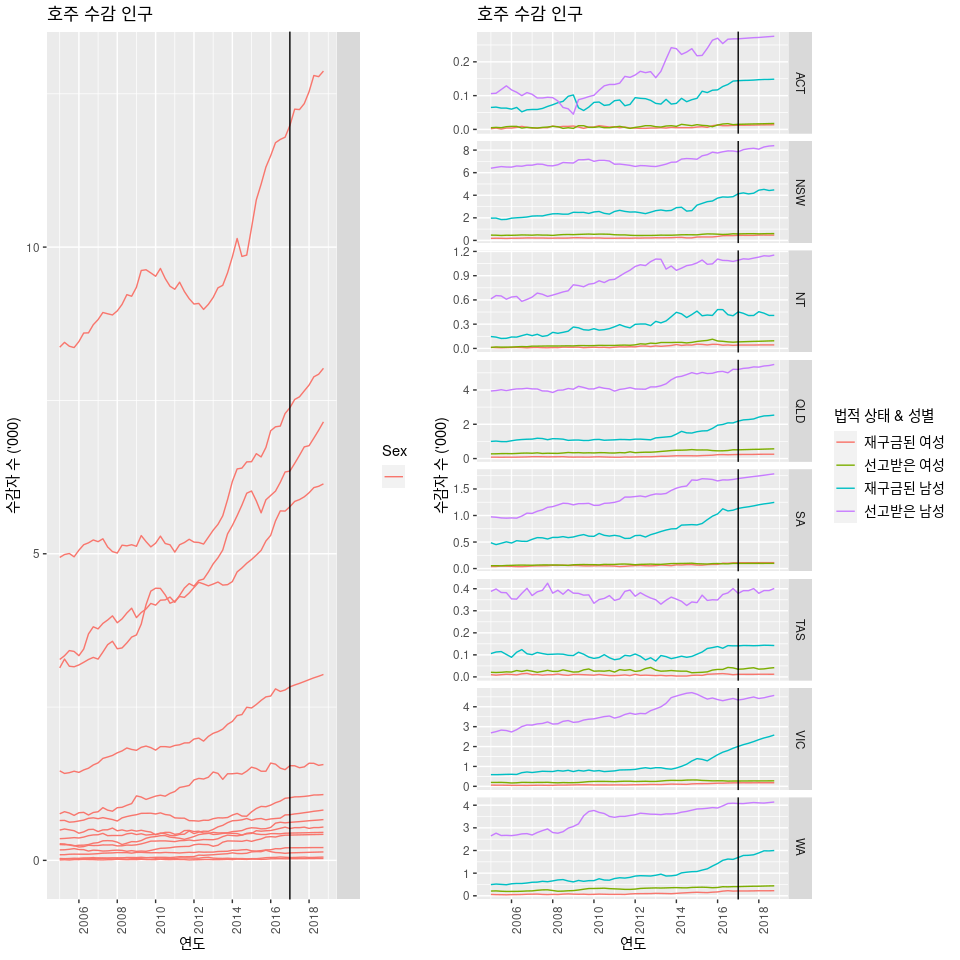

`acurracy()` 명령어는 계층적이거나 그룹화된 구조에 걸쳐 예측 정확도를 계산할 때 유용합니다. 다음에 나오는 표에서는 상향식 방법과 최적 조정 기법으로 2015년 1분기부터 2016년 4분기까지 테스트 기간을 예측한 결과를 요약합니다.

결과를 통해 특별히 꼭대기 수준에서 최적 조정 기법이 더 정확한 예측값을 내는 것을 알 수 있습니다. 일반적으로 최적 조정 기법이 구조 안에 있는 모든 수준의 정보를 사용하기 때문에 제한된 정보를 사용하는 다른 전통적인 방법보다 더 정확한 일관된 예측값을 내는 것을 알 수 있습니다.

In [40]:
train <- window(prison.gts, end = c(2014, 4))
test <- window(prison.gts, start = 2015)

In [41]:
fcsts.opt <- forecast(train, h=8, method="comb",
                      weights="wls", fmethod="ets")

fcsts.bu <- forecast(train, h=8, method="bu",
                     fmethod="ets")

tab <- matrix(NA, ncol = 4, nrow = 6)

rownames(tab) <- c("전체", "주", "법적 상태", "성별", "밑바닥", "모든 시계열")
colnames(tab) <- c("MAPE", "MASE", "MAPE", "MASE")

In [45]:
tab[1, ] <- c(
  accuracy(fcsts.bu, test, levels = 0)[c("MAPE", "MASE"), "Total"],
  accuracy(fcsts.opt, test, levels = 0)[c("MAPE", "MASE"), "Total"]
)

j <- 2

for (i in c(1:3, 7)) {
  tab[j, ] <- c(
    mean(accuracy(fcsts.bu, test, levels = i)["MAPE", ]),
    mean(accuracy(fcsts.bu, test, levels = i)["MASE", ]),
    mean(accuracy(fcsts.opt, test, levels = i)["MAPE", ]),
    mean(accuracy(fcsts.opt, test, levels = i)["MASE", ])
  )
  j <- j + 1
}

tab[6, ] <- c(
  mean(accuracy(fcsts.bu, test)["MAPE", ]),
  mean(accuracy(fcsts.bu, test)["MASE", ]),
  mean(accuracy(fcsts.opt, test)["MAPE", ]),
  mean(accuracy(fcsts.opt, test)["MASE", ])
)

In [55]:
tab

,MAPE,MASE,MAPE,MASE
전체,5.319487,1.836202,3.083556,1.064423
주,7.587158,1.875263,7.623787,1.845028
법적 상태,6.404279,1.756171,4.319457,1.143369
성별,8.619322,2.684583,8.722777,2.744076
밑바닥,15.822023,2.233101,15.247794,2.157624
모든 시계열,12.412906,2.157424,12.024966,2.079179


<table>
<caption>서로 다른 시계열 그룹에 대한 호주 수감 인구 예측값의 정확도.</caption>
 <thead>
<tr>
<th style="empty-cells: hide;border-bottom:hidden;" colspan="1"></th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="2"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Bottom-up</div></th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="2"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Optimal</div></th>
</tr>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> MAPE </th>
   <th style="text-align:right;"> MASE </th>
   <th style="text-align:right;"> MAPE </th>
   <th style="text-align:right;"> MASE </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> 전체 </td>
   <td style="text-align:right;"> 5.32 </td>
   <td style="text-align:right;"> 1.84 </td>
   <td style="text-align:right;"> 3.08 </td>
   <td style="text-align:right;"> 1.06 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 주 </td>
   <td style="text-align:right;"> 7.59 </td>
   <td style="text-align:right;"> 1.88 </td>
   <td style="text-align:right;"> 7.62 </td>
   <td style="text-align:right;"> 1.85 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 법적 상태 </td>
   <td style="text-align:right;"> 6.40 </td>
   <td style="text-align:right;"> 1.76 </td>
   <td style="text-align:right;"> 4.32 </td>
   <td style="text-align:right;"> 1.14 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 성별 </td>
   <td style="text-align:right;"> 8.62 </td>
   <td style="text-align:right;"> 2.68 </td>
   <td style="text-align:right;"> 8.72 </td>
   <td style="text-align:right;"> 2.74 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 밑바닥 </td>
   <td style="text-align:right;"> 15.82 </td>
   <td style="text-align:right;"> 2.23 </td>
   <td style="text-align:right;"> 15.25 </td>
   <td style="text-align:right;"> 2.16 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 모든 시계열 </td>
   <td style="text-align:right;"> 12.41 </td>
   <td style="text-align:right;"> 2.16 </td>
   <td style="text-align:right;"> 12.02 </td>
   <td style="text-align:right;"> 2.08 </td>
  </tr>
</tbody>
</table>